<p style="background-color:#3ab1c8;font-family:Cursive;font-size:200%;color:black;text-align:center;border-radius:120px 20px;padding:20px;margin:20px;"><b>PROPHET LIBRARY SAMPLE - January 2024</b></p>

<p style="font-family:Cursive;font-size:100%;color:black;text-align:center;border-radius:10px 10px;"><b>by Nash</b></p>

<b style="font-family:Cursive;font-size:100%;color:black;text-align:right;border-radius:10px 10px;">Follow me [Linkedin](www.linkedin.com/in/nash-n-sungur-333869289) | [Git Hub](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0)</b>

In [1]:
# bu kısım onemli.. 
# literaturdeki kaynaklar eski versiyonu paylasıyor..hata almamak için bu kurulum önemli


#pip install prophet pandas matplotlib plotly scikit-learn

# Verinin içe aktarılması

In [2]:
import pandas as pd

path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = pd.read_csv(path, header=0)

print(df.shape)
print(df.head())

(108, 2)
     Month  Sales
0  1960-01   6550
1  1960-02   8728
2  1960-03  12026
3  1960-04  14395
4  1960-05  14587


# Verinin Görselleştirilmesi

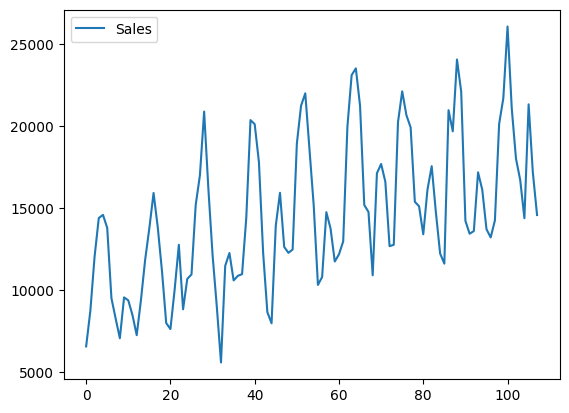

In [3]:
#veri analizinde önce mevsimseliğe bakalım, trend i görelim
# grafikte mevsimsellik ve trend var

from matplotlib import pyplot

df.plot()
pyplot.show()

# Veri Tipi Dönüşümü


In [4]:
df.dtypes

Month    object
Sales     int64
dtype: object

In [5]:
# columns tiplerini ve adlarını degiselim

df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])

In [6]:
# model oluşturlım

from prophet import Prophet

model = Prophet()
model.fit(df)

17:36:56 - cmdstanpy - INFO - Chain [1] start processing
17:36:56 - cmdstanpy - INFO - Chain [1] done processing


# Ornek içi Tahmin yapalım

In [7]:
#urettiğimiz degerlere karşılık tahminler yaptıracağız
future = list()

for i in range(1, 13):
    date = '1968-%02d' % i
    future.append([date])
    
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1968-01-01,17822.760174,12762.614083,15840.566328,17822.760174,17822.760174,-3456.922028,-3456.922028,-3456.922028,-3456.922028,-3456.922028,-3456.922028,0.0,0.0,0.0,14365.838146
1,1968-02-01,17878.311629,13392.364835,16528.452173,17878.311629,17878.311629,-2938.005879,-2938.005879,-2938.005879,-2938.005879,-2938.005879,-2938.005879,0.0,0.0,0.0,14940.305749
2,1968-03-01,17930.279118,19373.460620,22506.744978,17930.279118,17930.279118,2951.749732,2951.749732,2951.749732,2951.749732,2951.749732,2951.749732,0.0,0.0,0.0,20882.028850
3,1968-04-01,17985.830573,21395.091075,24518.163814,17985.830573,17985.830573,4914.585963,4914.585963,4914.585963,4914.585963,4914.585963,4914.585963,0.0,0.0,0.0,22900.416536
4,1968-05-01,18039.590046,22704.795433,25738.146902,18039.590046,18039.590046,6161.490156,6161.490156,6161.490156,6161.490156,6161.490156,6161.490156,0.0,0.0,0.0,24201.080202


In [8]:
 # tahmin tarih saat ds, tahmin degeri yhat, tahmin edilen deger,n sust ve alt sınırları da 'yhat_lower', 'yhat_upper

In [9]:
# 1 ocak, 1 şubat ,
# 1 mart için tahminleri alıyoruz

print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds          yhat    yhat_lower    yhat_upper
0 1968-01-01  14365.838146  12762.614083  15840.566328
1 1968-02-01  14940.305749  13392.364835  16528.452173
2 1968-03-01  20882.028850  19373.460620  22506.744978
3 1968-04-01  22900.416536  21395.091075  24518.163814
4 1968-05-01  24201.080202  22704.795433  25738.146902


# Tahminlerin çizdirilmesi

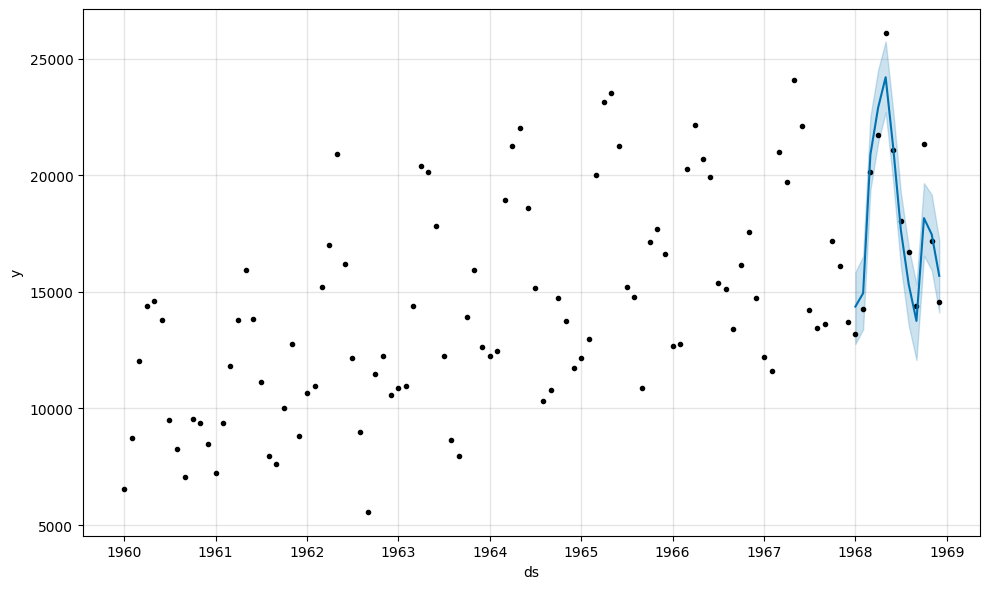

In [10]:
# tahmin edilen ve gerçek değerler var..
# hem sezonsallıgı hem de trendi yakaladı

model.plot(forecast)
pyplot.show()

          ds          yhat    yhat_lower    yhat_upper
0 1969-01-01  15414.370948  13814.116884  17049.949139
1 1969-02-01  16182.031762  14602.809316  17708.242555
2 1969-03-01  21399.275915  19790.325320  23033.487682
3 1969-04-01  23514.723288  21962.152952  25145.147245
4 1969-05-01  25020.049095  23466.459325  26651.523568


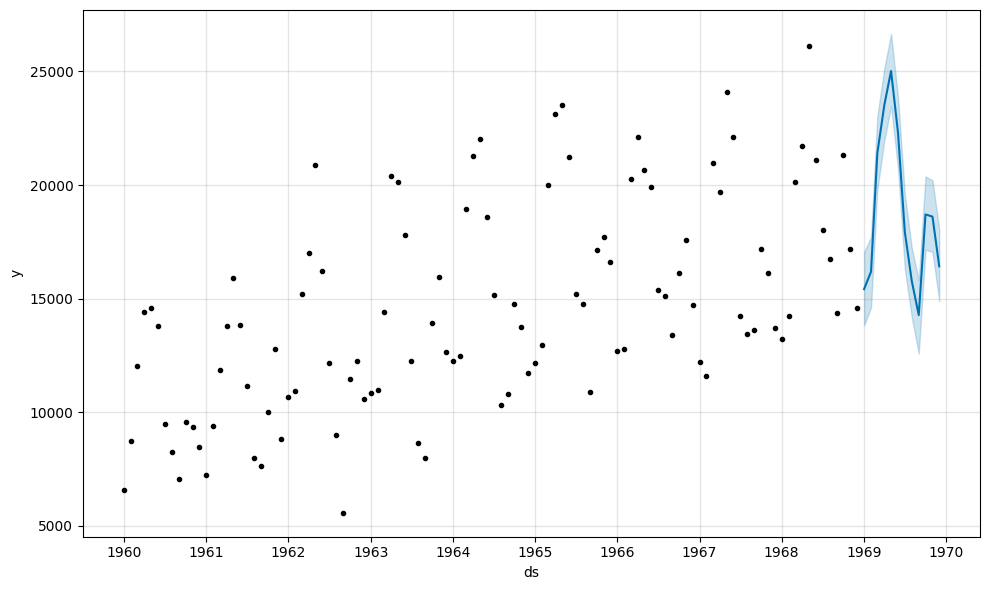

In [11]:
# burada da ornek dışı tahmin yapıyoruz..elimizdkei tüm datalardan 

future = list()

for i in range(1, 13):
    date = '1969-%02d' % i
    future.append([date])
    
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])

forecast = model.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

model.plot(forecast)
pyplot.show()

# Manuel degerlendirme

In [12]:
# elimizdeki son 1 yılın datasını çıkarıp ondan onceki yılların verisiyle datamızı eğitelim
# son 1 yılın verisini test datası şeklinde tahmin yaptıralım ve gerçek degerlerle tahmini degerleri karşılaştırlaım



In [13]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot

path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = pd.read_csv(path, header=0)

df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])


In [14]:
# elimizdeki datanın son 1 yılını düşürelim.. 1968 yılı düştü

train = df.drop(df.index[-12:])
print(train.tail())

           ds      y
91 1967-08-01  13434
92 1967-09-01  13598
93 1967-10-01  17187
94 1967-11-01  16119
95 1967-12-01  13713


In [15]:
# 1968 yılı için tahminl yapalım ve modeli oluşturaup eğitelim

model = Prophet()
model.fit(train)    # 1967 ye kadar olan degerlerle fit ediyoruz

future = list()
for i in range(1, 13):
    date = '1968-%02d' % i
    future.append([date])
    
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds'] = pd.to_datetime(future['ds'])

print('\n Maalesef verbose false yapamiyoruz :/ \n')
forecast = model.predict(future)

17:36:57 - cmdstanpy - INFO - Chain [1] start processing
17:36:58 - cmdstanpy - INFO - Chain [1] done processing



 Maalesef verbose false yapamiyoruz :/ 



In [16]:
#elimizdeki gerçek 1968 degerleri ile tahmin edilenleri kıyaslayacağız
y_true = df['y'][-12:].values
y_pred = forecast['yhat'].values

In [17]:
# pred ve actual deger kıyası için MAE yi kullanalım.. ortalama hata

mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 1336.813


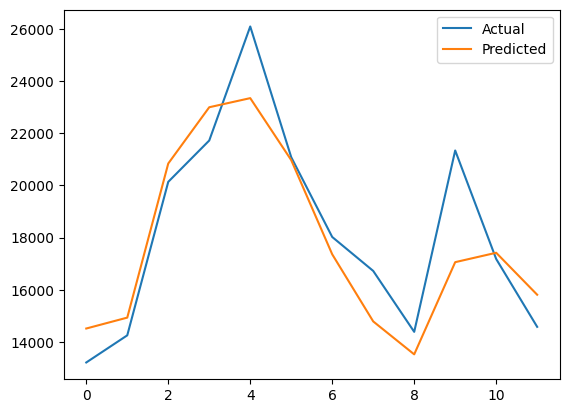

In [18]:
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

# son 1 yıl içindeki değerlerle tahmin edilen değerleri kıyasladık
# hem sezonsallığı hem de trendi yakalamış görünüyor